In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:\\Users\\dhanu\\fake_job_postings.csv')

In [9]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [20]:
df.shape

(17880, 18)

In [17]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Dataset Insights

#### General Information:
- **Total Records:** 17,880

#### Column Summaries:
1. **`telecommuting`** (Binary: 0 or 1)
   - Mean: 4.3% of jobs allow telecommuting.
   - Most jobs (75%) do **not** allow telecommuting.

2. **`has_company_logo`** (Binary: 0 or 1)
   - Mean: 79.5% of jobs have a company logo.
   - 75% of records indicate the presence of a company logo, implying its commonness.

3. **`has_questions`** (Binary: 0 or 1)
   - Mean: 49.1% of jobs include screening questions.
   - There is an even split, with half of the records featuring screening questions.

4. **`fraudulent`** (Binary: 0 or 1)
   - Mean: 4.8% of jobs are fraudulent.
   - Fraudulent jobs are relatively rare, with the majority being legitimate.

#### Key Observations:
- The dataset is heavily skewed towards non-telecommuting jobs with legitimate postings.
- The presence of a company logo is a common feature, potentially signaling credibility.
- Screening questions are included in about half of the postings, likely for additional filtering.


**Feature Selection**

In [23]:
df = df[['title', 'location', 'company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 
'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'salary_range','fraudulent']]


**Handling missing values & Outliers**

In [26]:
df.duplicated().sum()

493

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [30]:
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]

df_categ = df[['title', 'location', 'company_profile', 'requirements', 'employment_type','required_experience', 'required_education', 'industry', 'function']]

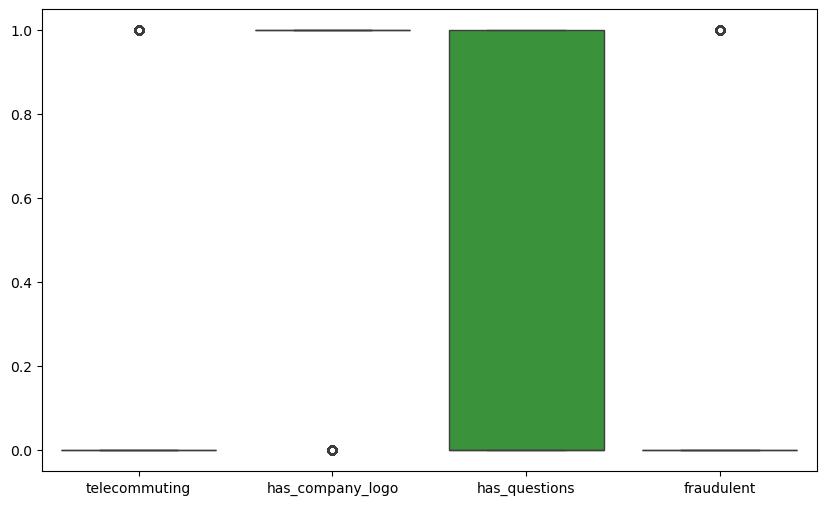

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [38]:
#Removing Outliers

df_num = df_num[df_num['telecommuting']<0.9]
df_num=df_num[df_num['has_company_logo']>0.1]
df_num = df_num[df_num['fraudulent']<0.9]

df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [40]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2550
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [52]:
df.dropna(axis=0,inplace=True)

In [54]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [58]:
df.shape

(1485, 14)

# Exploratory Data Analysis

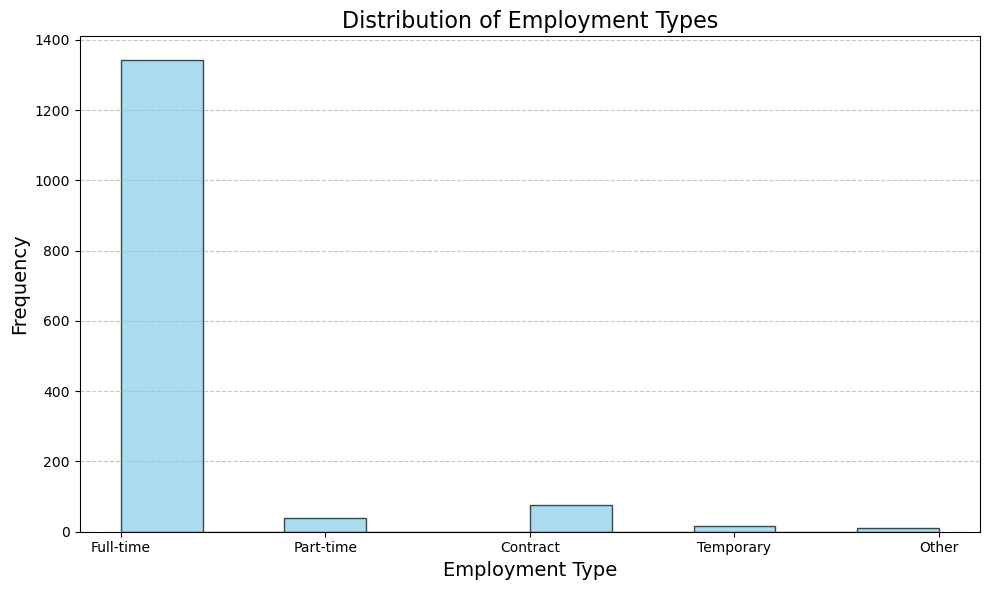

In [65]:
plt.figure(figsize=(10, 6))  
plt.hist(df.employment_type,color='skyblue',ec='black',alpha=0.7)
plt.title("Distribution of Employment Types", fontsize=16)
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

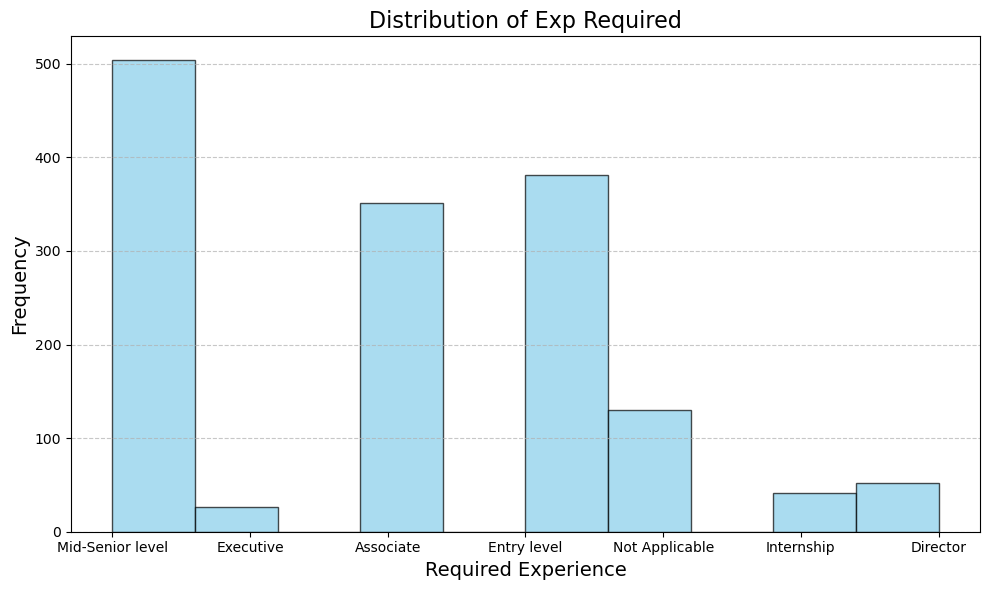

In [69]:
plt.figure(figsize=(10, 6))  
plt.hist(df.required_experience,color='skyblue',ec='black',alpha=0.7)
plt.title("Distribution of Exp Required", fontsize=16)
plt.xlabel("Required Experience", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

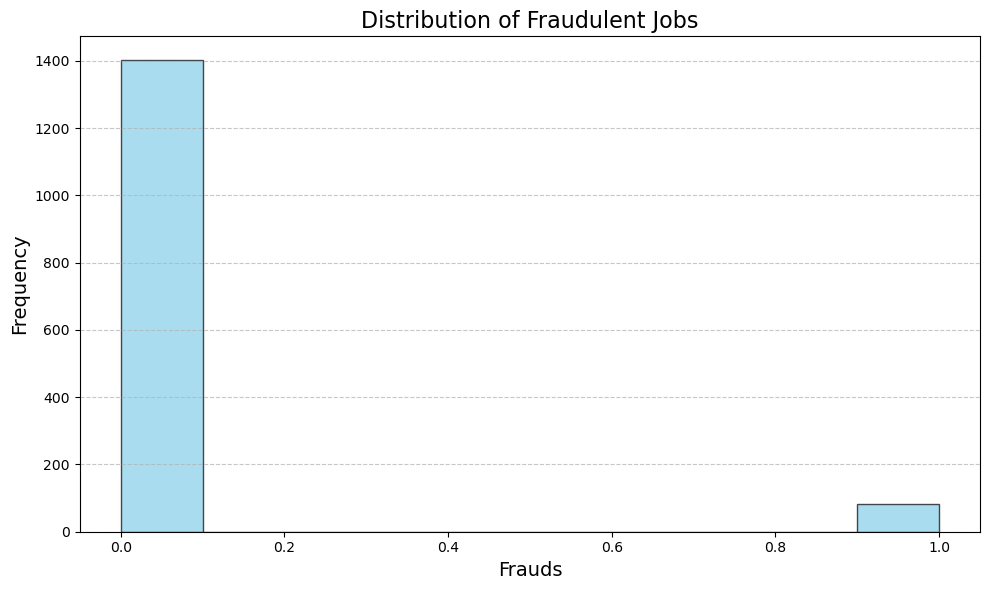

In [71]:
plt.figure(figsize=(10, 6))  
plt.hist(df.fraudulent,color='skyblue',ec='black',alpha=0.7)
plt.title("Distribution of Fraudulent Jobs", fontsize=16)
plt.xlabel("Frauds", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_23124\942969431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='function',data=df,order=order,palette='viridis')


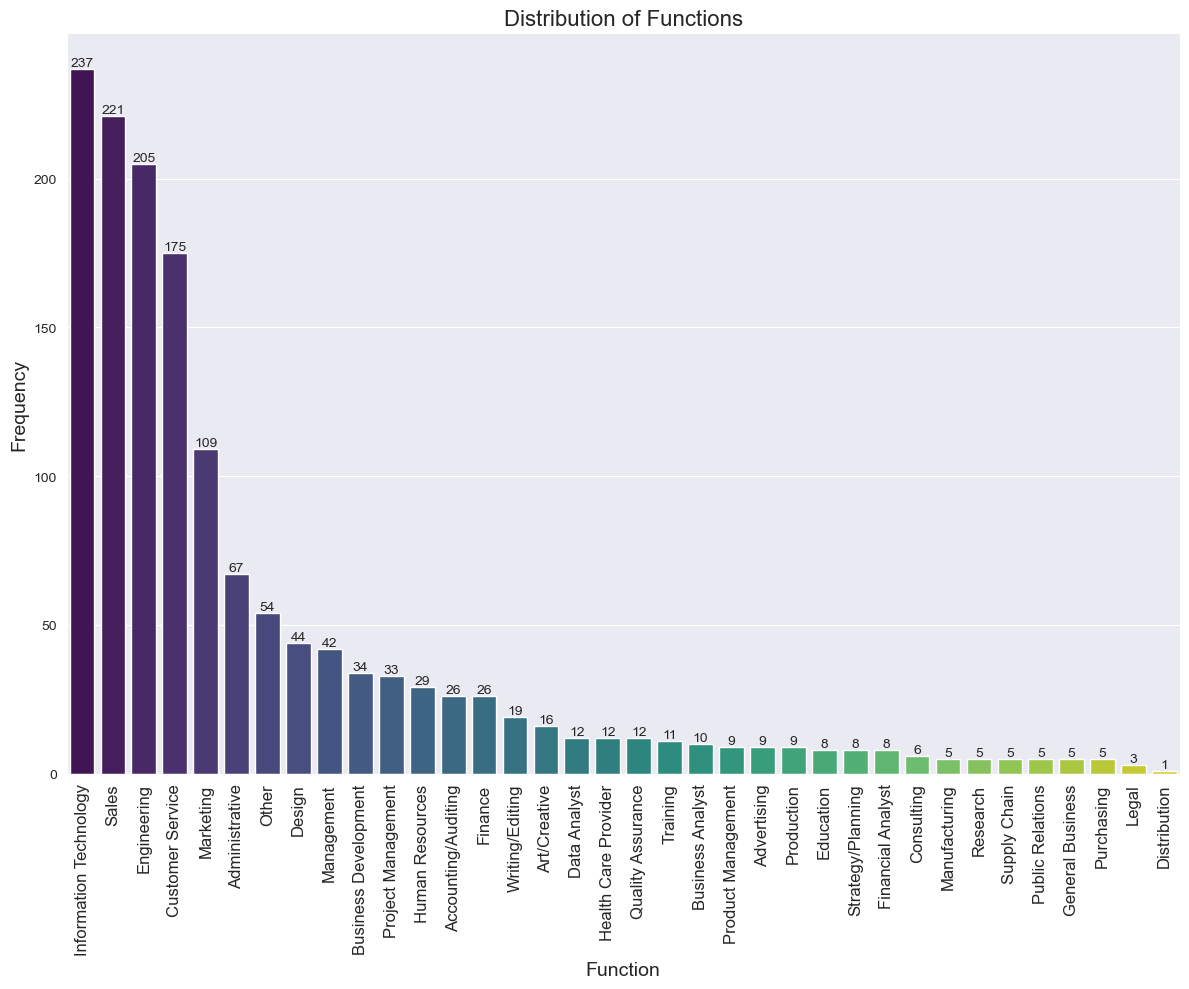

In [82]:
plt.figure(figsize=(12, 10)) 
sns.set_style('darkgrid')
order = df['function'].value_counts().index
sns.countplot(x='function',data=df,order=order,palette='viridis')
plt.title("Distribution of Functions", fontsize=16)
plt.xlabel("Function", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [84]:
df_jobs_fulltime =  df[(df['employment_type']=='Full-time') &  ( df['fraudulent']==0)]

In [86]:
df_jobs_fulltime['title'].value_counts()

title
Agent-Inbound Sales Position                                12
Marketing Manager                                            8
Customer Service Representative                              8
Account Manager                                              7
Technical Support Associate                                  7
                                                            ..
Sales Executive for Content Marketing Firm                   1
Wait Staff Position Available                                1
Graduate application - HW Design                             1
Senior Quant Analyst                                         1
Portfolio Development Associate - Paris & rest of France     1
Name: count, Length: 1027, dtype: int64

Agent-Inbound Sales Position  has most opportunities of full-time job with no frauds

In [93]:
df_industry_mostfake = df[df['fraudulent']==1]
df_industry_mostfake['industry'].value_counts()

industry
Oil & Energy                            19
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Retail                                   4
Management Consulting                    3
Hospital & Health Care                   2
Accounting                               2
Telecommunications                       2
Hospitality                              2
Human Resources                          2
Biotechnology                            2
Insurance                                2
Transportation/Trucking/Railroad         2
Construction                             1
Defense & Space                          1
Computer Networking                      1
Mechanical or Industrial Engineering     1
Warehousing                              1
Media Production                         1
Information Services                     1
Logistics and Supply Chain               1
Se

**Oil & Energy is the industry with the most fake jobs(19), followed by Real Estate(10)**

**Getting Balanced Dataset**

In [98]:
df['fraudulent'].value_counts()

fraudulent
0    1403
1      82
Name: count, dtype: int64

In [100]:
fraud_jobs = df[df['fraudulent']==1]
real_jobs=df[df['fraudulent']==0]
fraud_jobs.shape, real_jobs.shape

((82, 14), (1403, 14))

In [111]:
fraud_jobs = fraud_jobs.sample(1403,replace=True)

fraud_jobs.shape,real_jobs.shape

((1403, 14), (1403, 14))

In [115]:
df = pd.concat([fraud_jobs, real_jobs], ignore_index=True)
df.reset_index(drop=True,inplace=True)


In [117]:
df.shape

(2806, 14)

# Encoding

In [123]:
df_categ.columns

Index(['title', 'location', 'company_profile', 'requirements',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function'],
      dtype='object')

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [133]:
df.reset_index()
df.head()

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,238,395,49,359,0,1,1,1,2,4,52,7,233,1
1,47,264,156,601,0,1,0,1,6,4,0,1,21,1
2,137,400,326,1029,0,1,1,1,0,4,32,7,266,1
3,402,393,49,1287,0,1,1,1,5,4,43,4,331,1
4,918,238,224,576,0,1,0,3,2,4,12,31,194,1


In [135]:
df.shape

(2806, 14)

# Model Building

In [138]:
X = df[['title', 'location', 'company_profile', 'requirements','telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
'required_experience', 'required_education', 'industry', 'function',
'salary_range']].values 

y = df['fraudulent'].values

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1880, 13), (926, 13), (1880,), (926,))

# Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(solver='lbfgs',max_iter=300)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
from sklearn.metrics import accuracy_score 
print('Accuracy score using Logistic Regression :',accuracy_score(y_test ,y_pred_lr))

Accuracy score using Logistic Regression : 0.7213822894168467


# KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()

In [166]:
neighbors_with_accuracies = {}
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    neighbors_with_accuracies[i]=acc

In [168]:
neighbors_with_accuracies

{1: 0.9881209503239741,
 2: 0.9881209503239741,
 3: 0.9751619870410367,
 4: 0.9665226781857451,
 5: 0.9481641468682506,
 6: 0.9481641468682506,
 7: 0.9308855291576674,
 8: 0.9308855291576674,
 9: 0.9265658747300216,
 10: 0.9265658747300216,
 11: 0.9125269978401728,
 12: 0.91792656587473,
 13: 0.908207343412527,
 14: 0.9049676025917927,
 15: 0.8876889848812095,
 16: 0.8876889848812095,
 17: 0.8693304535637149,
 18: 0.8758099352051836,
 19: 0.8671706263498921}

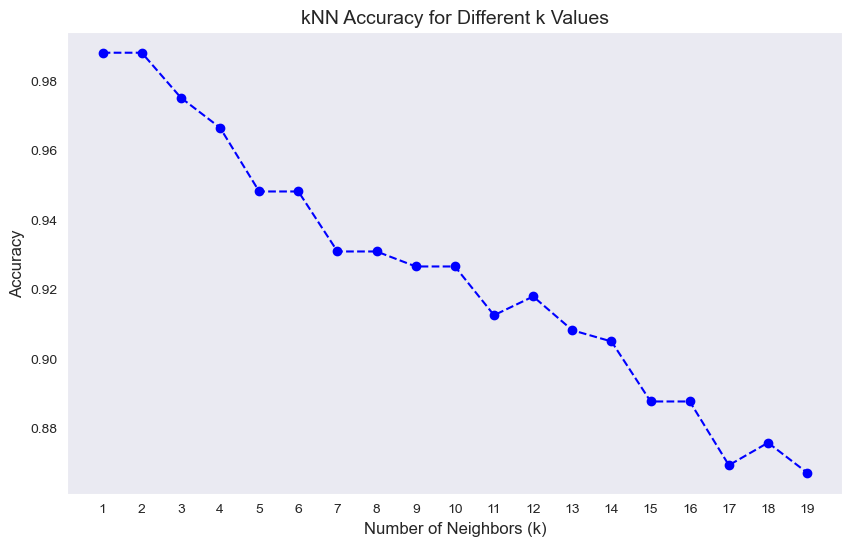

In [170]:
import matplotlib.pyplot as plt

k_values = list(neighbors_with_accuracies.keys())
accuracies = list(neighbors_with_accuracies.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='blue', linestyle='--')
plt.title('kNN Accuracy for Different k Values', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_values)
plt.grid()
plt.show()


In [172]:
max(neighbors_with_accuracies.values())

0.9881209503239741

In [174]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [178]:
y_pred_knn = knn.predict(X_test)
print("Accuracy Score using KNN:", accuracy_score(y_test, y_pred_knn))

Accuracy Score using KNN: 0.9881209503239741


# Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
y_pred_rf = rf.predict(X_test)
print("Accuracy Score using Random Forest:", accuracy_score(y_test, y_pred_rf))

Accuracy Score using Random Forest: 0.9989200863930886


# Model Evaluation

In [190]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest'],
    'Score' : [accuracy_score(y_test,y_pred_lr),
               accuracy_score(y_test,y_pred_knn),
               accuracy_score(y_test,y_pred_rf)]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,0.998920
1,KNN,0.988121
0,Logistic Regression,0.721382
